Data preparation

In [ ]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [3]:
print(df.head())

   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  


EDA

In [4]:
# Check for missing values in each column
print(df.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [5]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

In [6]:
# Check for outliers in all columns
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        filter = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 *IQR)
        print(f"Outliers in {column}:")
        print(df.loc[~filter])

Outliers in age:
     age   sex               cp  trestbps  chol    fbs         restecg  \
134   29  Male  atypical angina       130   204  False  lv hypertrophy   

     thalch  exang  oldpeak      slope    thal  num  
134     202  False      0.0  upsloping  normal    0  
Outliers in trestbps:
     age     sex               cp  trestbps  chol    fbs           restecg  \
190   53    Male     asymptomatic        80     0   True            normal   
243   39    Male  atypical angina       190   241  False            normal   
383   63  Female  atypical angina       181     0  False            normal   
384   74    Male      non-anginal       188     0  False            normal   
387   45    Male      non-anginal       193   236  False            normal   
396   55    Male      non-anginal       196   406  False  st-t abnormality   
487   54    Male  atypical angina       192   283  False    lv hypertrophy   
488   63    Male     asymptomatic       185     0  False            normal   
58

In [7]:
# Handling outliers can be tricky as it depends on the nature of the data. One common method is to replace outliers with the median. Here we use the IQR method to detect and replace outliers.
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        filter = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 *IQR)
        df.loc[~filter, column] = df[column].median()

In [8]:
# Check for unique values in each column
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Unique values in {column}:")
        print(df[column].unique())

Unique values in sex:
['Male' 'Female']
Unique values in cp:
['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
Unique values in restecg:
['lv hypertrophy' 'normal' 'st-t abnormality']
Unique values in exang:
[False True 'FALSE' 'TURE']
Unique values in slope:
['downsloping' 'flat' 'upsloping']
Unique values in thal:
['fixed defect' 'normal' 'reversable defect']


In [9]:
# Summary statistics
print(df.describe())

              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  908.000000  908.000000
mean    53.819383  132.283040  239.733480  136.042952    0.836187    1.008811
std      9.120919   17.840598   46.929649   26.685958    0.944471    1.144436
min     30.000000   90.000000   85.000000   63.000000   -2.000000    0.000000
25%     48.000000  120.000000  216.000000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.800000    1.000000
75%     60.000000  140.000000  267.000000  156.000000    1.500000    2.000000
max     77.000000  180.000000  409.000000  202.000000    3.700000    4.000000


In [10]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

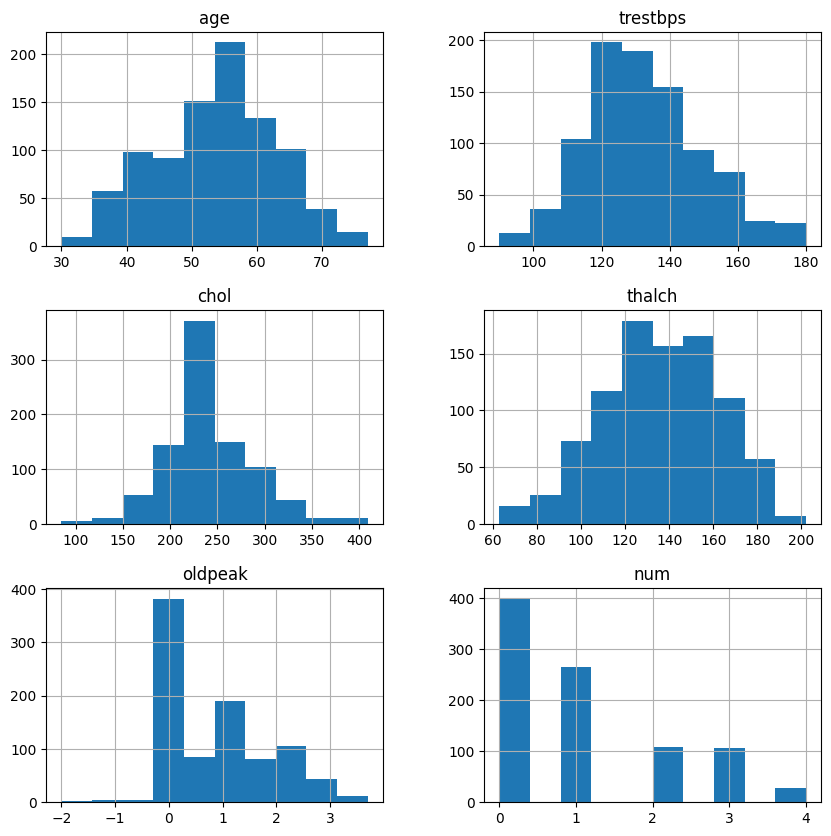

In [11]:
# Visualize the distribution of features
# Histogram
df.hist(figsize=(10,10))
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6612\3148927620.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


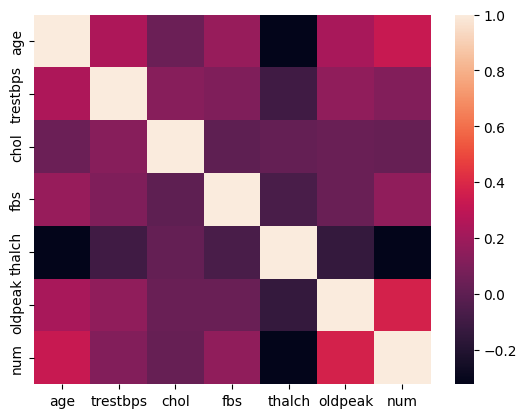

In [12]:
# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix)
plt.show()

Feature Engineering

In [13]:
# For simplicity, let's assume 'sex', 'cp', 'restecg', 'exang', 'slope', 'thal' are categorical variables
# We can use pandas get_dummies function to encode these variables
df_encoded = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'])

In [14]:
print(df_encoded.head())

   age  trestbps  chol    fbs  thalch  oldpeak  num  sex_Female  sex_Male  \
0   63       145   233   True     150      2.3    0           0         1   
1   41       135   203  False     132      0.0    0           0         1   
2   57       140   192  False     148      0.4    0           0         1   
3   52       118   186  False     190      0.0    0           0         1   
4   57       110   201  False     126      1.5    0           0         1   

   cp_asymptomatic  ...  exang_False  exang_True  exang_FALSE  exang_TURE  \
0                0  ...            1           0            0           0   
1                0  ...            1           0            0           0   
2                1  ...            1           0            0           0   
3                0  ...            1           0            0           0   
4                1  ...            0           1            0           0   

   slope_downsloping  slope_flat  slope_upsloping  thal_fixed defect  \
0 

Decision Tree Classification

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [16]:
# Split the dataset into training and testing sets
X = df_encoded.drop('num', axis=1)
y = df_encoded['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Implement a Decision Tree Classification model
clf = DecisionTreeClassifier()

In [18]:
# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
# Make predictions
y_pred = clf.predict(X_test)

In [20]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.5054945054945055
Precision: 0.4778121875237009
Recall: 0.5054945054945055
F1 Score: 0.4901035344583731


 Hyperparameter Tuning:

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid = {'max_depth': list(range(1, 11)), 'min_samples_split': list(range(2, 11)), 'criterion': ['gini', 'entropy']}

In [23]:
# Instantiate the grid
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')

In [24]:
# Fit the grid with data
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [25]:
# View the complete results
print(grid.cv_results_)

{'mean_fit_time': array([0.00852454, 0.00599861, 0.00690041, 0.00470231, 0.00651104,
       0.00705936, 0.00484231, 0.00460029, 0.00490036, 0.00520046,
       0.00526574, 0.00522497, 0.0051007 , 0.00520463, 0.00519905,
       0.00609941, 0.00584791, 0.00545211, 0.00559919, 0.00540035,
       0.00595472, 0.00550091, 0.00559978, 0.00570023, 0.00491583,
       0.00458021, 0.00797362, 0.00468855, 0.00625074, 0.00488977,
       0.00628116, 0.00461462, 0.0062526 , 0.00468884, 0.00612731,
       0.00616276, 0.00485275, 0.00625224, 0.00468886, 0.00550027,
       0.00468915, 0.00645542, 0.00469053, 0.0073468 , 0.00781264,
       0.00863714, 0.00869858, 0.00699854, 0.00699818, 0.00699811,
       0.00709877, 0.00699823, 0.0074996 , 0.00739748, 0.00769904,
       0.00780127, 0.00859661, 0.00769815, 0.0074012 , 0.00750105,
       0.00817173, 0.00829916, 0.00889935, 0.01064439, 0.00789347,
       0.00819886, 0.00769906, 0.00799894, 0.00809932, 0.00839791,
       0.00929768, 0.00876751, 0.01020012, 0

In [26]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.5454908675799086
{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


Model Evaluation and Analysis:

In [27]:
from sklearn import tree

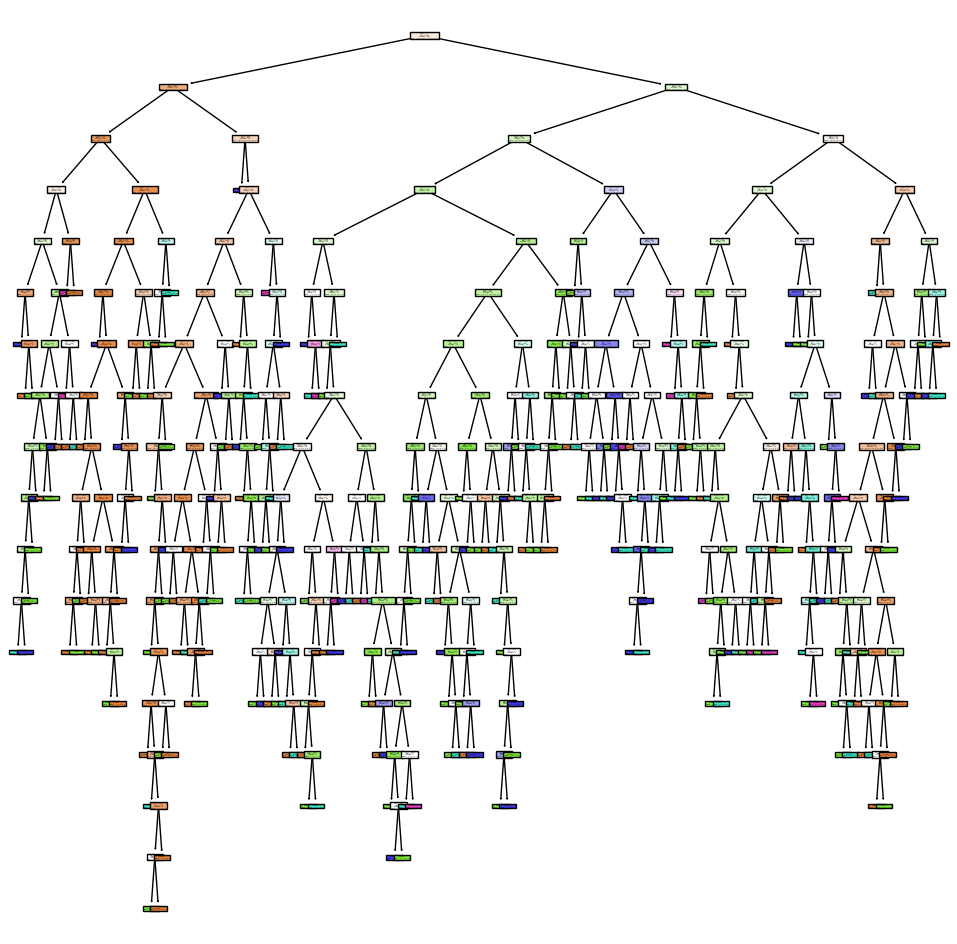

In [28]:
# Visualize the decision tree
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(clf, filled=True, ax=ax)
plt.show()